In [ ]:
Boston Housing Analysis

#Task 1: Familiarize Yourself with the Dataset

In [19]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [20]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [21]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [22]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [16]:
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


In [14]:
print(boston_df.describe())

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

In [15]:
print(boston_df.isnull().sum())

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64


#Task 2: Generate Descriptive Statistics and Visualizations

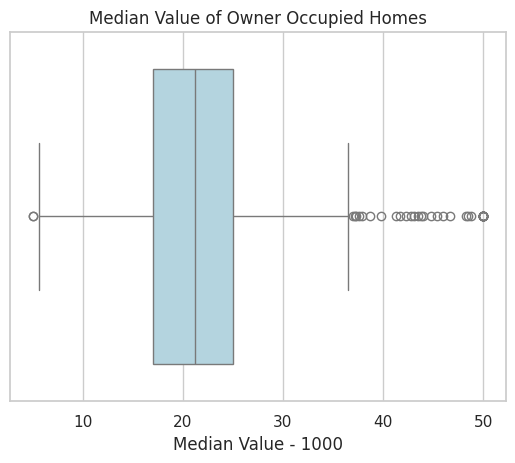

In [73]:
sns.boxplot(x=boston_df['MEDV'], color="lightblue")
pyplot.title('Median Value of Owner Occupied Homes')
pyplot.xlabel('Median Value - 1000')
pyplot.show()

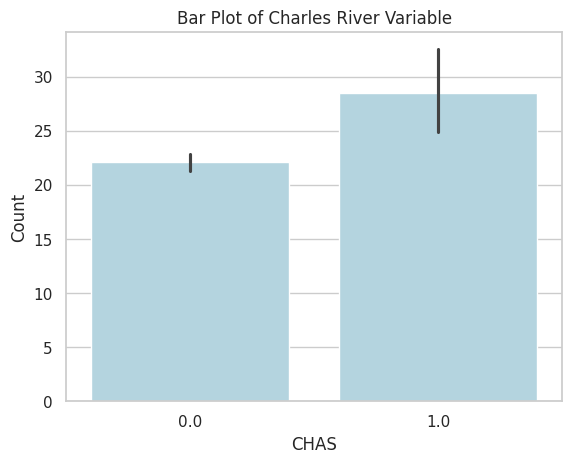

In [74]:
sns.barplot(x="CHAS", y="MEDV",data=boston_df, color="lightblue")
pyplot.title('Bar Plot of Charles River Variable')
pyplot.ylabel('Count')
pyplot.show()

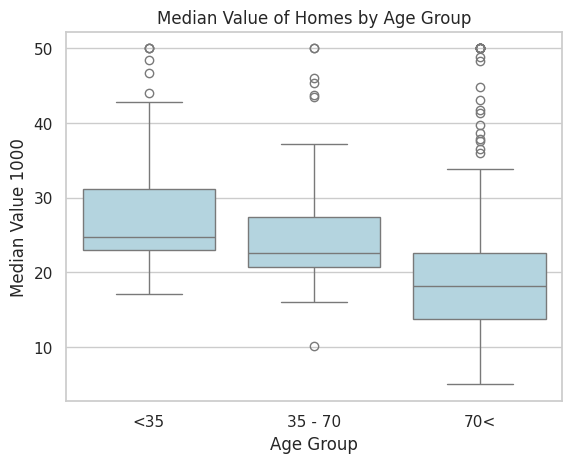

In [75]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['<35', '35 - 70', '70<'])
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, color="lightblue")
pyplot.title('Median Value of Homes by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value 1000')
pyplot.show()

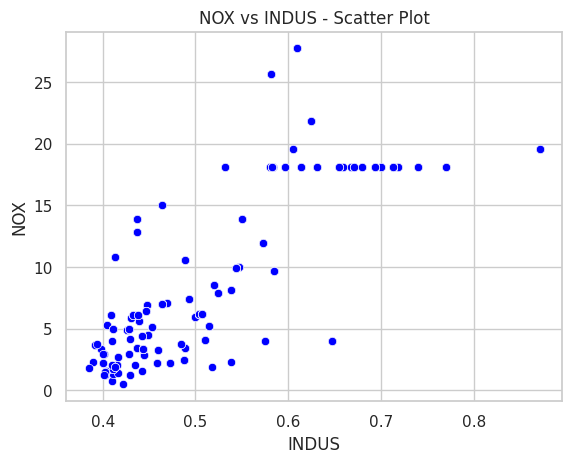

In [76]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df, color='blue')
pyplot.title('NOX vs INDUS - Scatter Plot')
pyplot.xlabel('INDUS')
pyplot.ylabel('NOX')
pyplot.show()

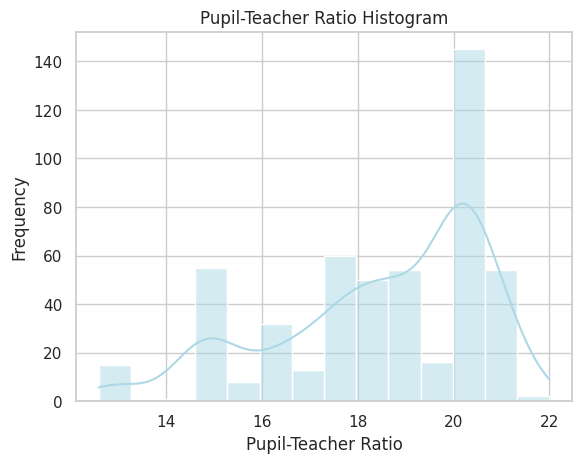

In [78]:
sns.histplot(boston_df['PTRATIO'], kde=True, color='lightblue')
pyplot.title('Pupil-Teacher Ratio Histogram')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

In [ ]:
#Task 3: Use the appropriate tests

In [80]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [83]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center='median')

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [84]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)